In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Chicago_Crimes.csv')

In [3]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h1>Cleaning Null Values</h1>

In [5]:
df['Date'] = df['Date'].astype('str')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors = 'coerce')

In [6]:
df['Location Description'] = df['Location Description'].fillna('unaccounted_location_description')
df['Community Area'] = df['Community Area'].fillna('unaccounted_community_area')
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mode()[0])
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].mode()[0])
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Location'] = df['Location'].fillna('unaccounted_location')

In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayofWeek'] = df['Date'].dt.day_name()

In [8]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
Hour                    0
DayofWeek               0
dtype: int64

<h1>Descriptive Analysis</h1>

<h2>Main Question #1</h2>

<h3>1.Which community has the highest number of crimes?</h3>

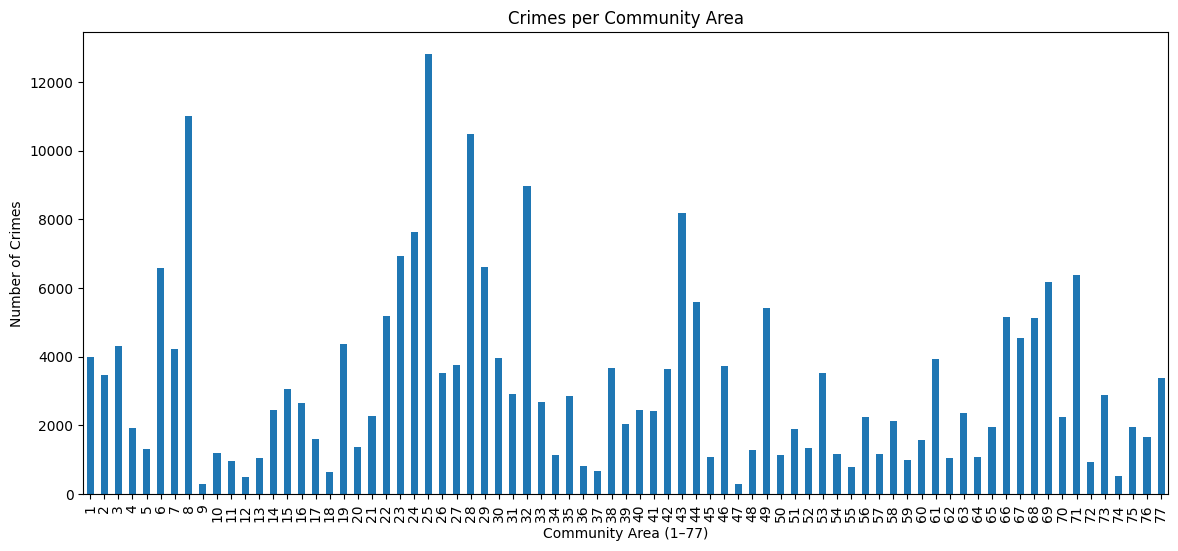

In [9]:
# Convert Community Area to numeric safely
df["Community Area"] = pd.to_numeric(df["Community Area"], errors="coerce").astype("Int64")

crimes_per_comm = df.groupby("Community Area").size().sort_index()
crimes_per_comm.plot(kind="bar", figsize=(14,6))
plt.title("Crimes per Community Area")
plt.xlabel("Community Area (1–77)")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 1</h3>
<h3>The community with the most crimes is Community Area 25 (Austin) followed by Community Area 8 (Near North Side) and Community Area 28 (Near West Side).</h3>
<hr>

<H2>Follow-up Questions</H2>

<h3>2.What is the most common crime type in Austin?</h3>

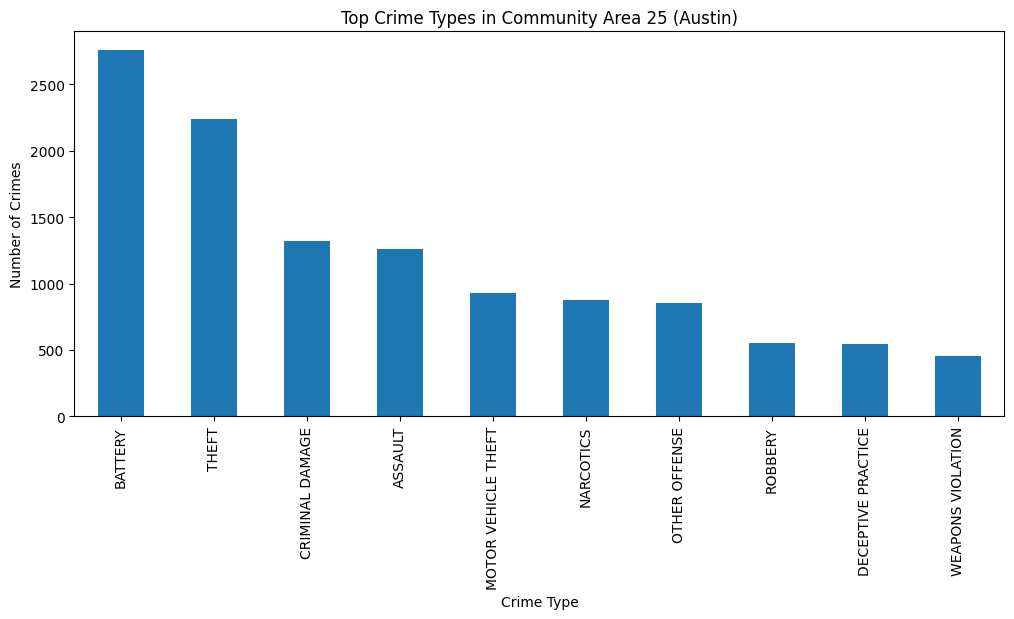

In [10]:
comm25_crimes = df[df["Community Area"] == 25]
comm25_primary = comm25_crimes["Primary Type"].value_counts()
comm25_primary.head(10).plot(kind="bar", figsize=(12,5))
plt.title("Top Crime Types in Community Area 25 (Austin)")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 2</h3>
<h3>Theft and battery dominate in Austin.</h3>
<hr>

<h3>3.Which year had the most crimes in Austin?</h3>

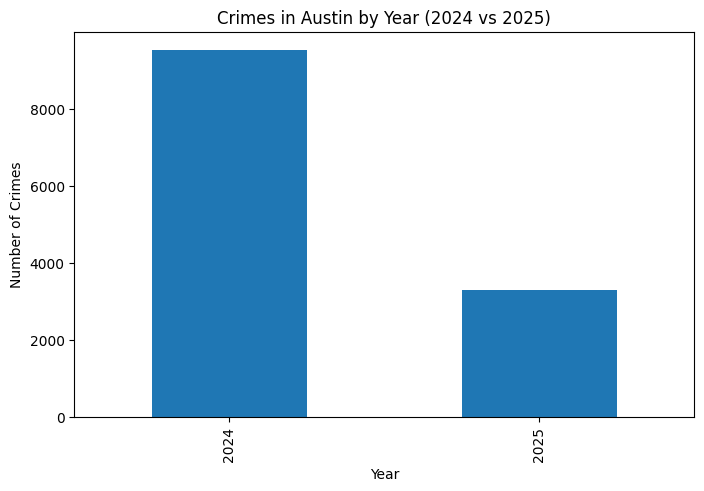

In [11]:
comm25_crimes["Year"].value_counts().sort_index().plot(kind="bar", figsize=(8,5))
plt.title("Crimes in Austin by Year (2024 vs 2025)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 3</h3>
<h3>With only 2024 and 2025 data available, we see whether crime is rising or falling year-over-year.</h3>
<hr>

<h3>4.What month has the most crimes in Austin?</h3>

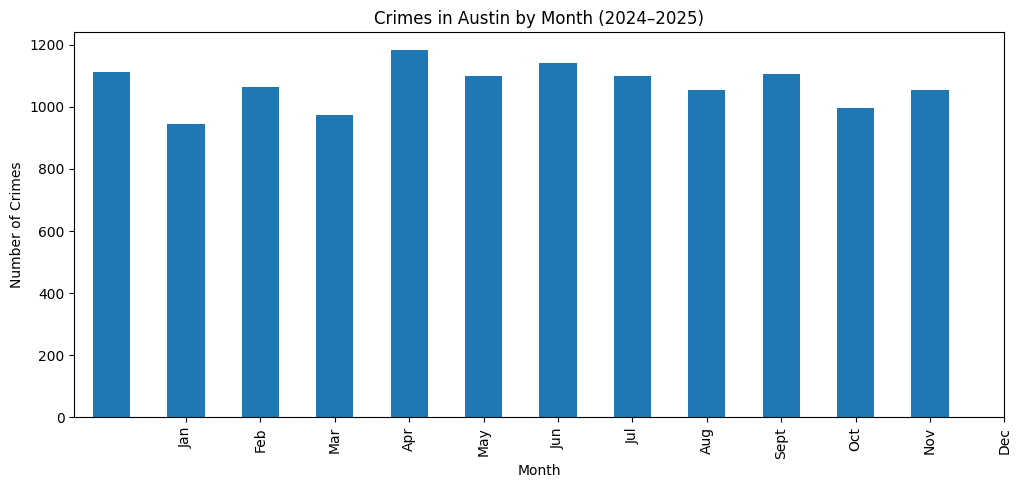

In [12]:
comm25_crimes["Month"] = pd.to_datetime(comm25_crimes["Date"]).dt.month
comm25_crimes["Month"].value_counts().sort_index().plot(kind="bar", figsize=(12,5))
plt.title("Crimes in Austin by Month (2024–2025)")
plt.xlabel("Month")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 4</h3>
<h3>The number of crimes stays fairly steady across months, but April shows the highest crime rate, while February and March are relatively lower. This suggests seasonal fluctuations where spring months see more crime.</h3>
<hr>

<h3>5.What is the most common crime location in Austin?</h3>

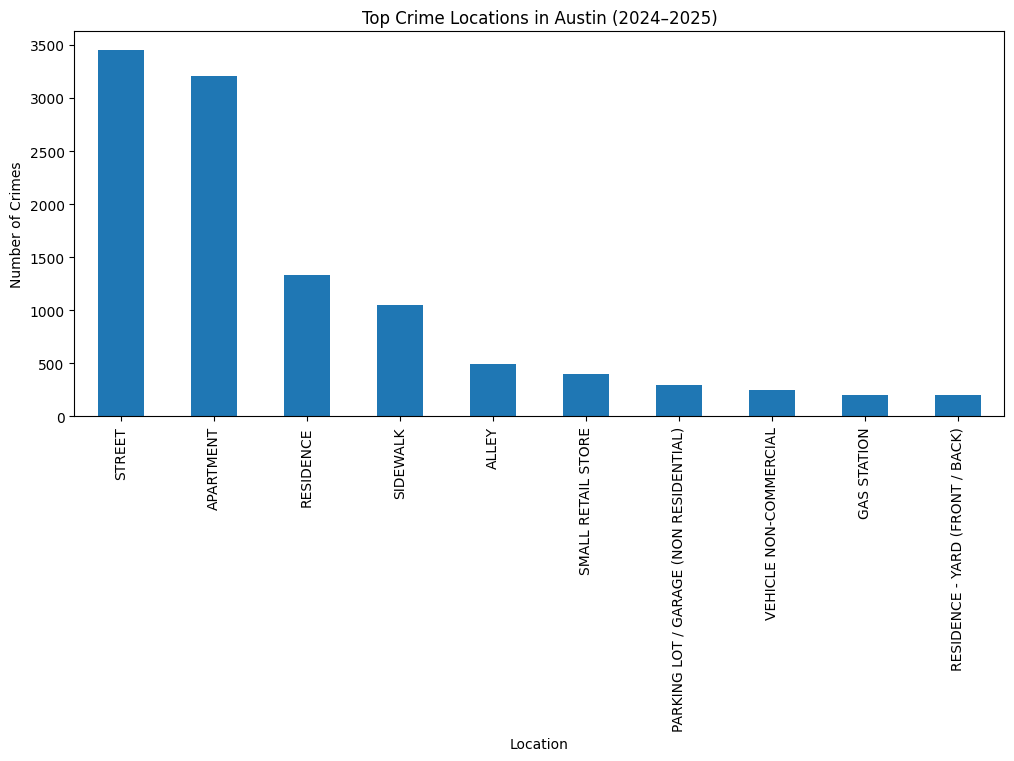

In [13]:
comm25_crimes["Location Description"].value_counts().head(10).plot(kind="bar", figsize=(12,5))
plt.title("Top Crime Locations in Austin (2024–2025)")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 5</h3>
<h3>The Street and Apartments are the most common crime locations, far higher than residences or other spots. This shows crimes are concentrated in public/open spaces and multi-family housing areas rather than private homes.</h3>
<hr>

<h3>6.Violent vs Non-Violent crimes in Austin?</h3>

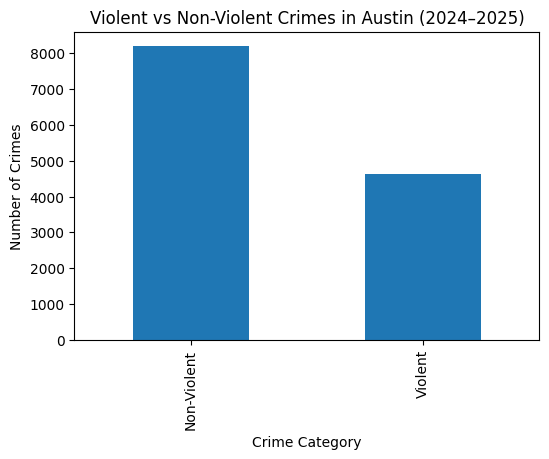

In [14]:
violent_types = ["BATTERY", "ASSAULT", "HOMICIDE", "CRIM SEXUAL ASSAULT", "ROBBERY"]
comm25_crimes["Crime Category"] = np.where(comm25_crimes["Primary Type"].isin(violent_types),
                                           "Violent", 
                                           "Non-Violent")
comm25_crimes["Crime Category"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Violent vs Non-Violent Crimes in Austin (2024–2025)")
plt.xlabel("Crime Category")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 6</h3>
<h3>Non-violent crimes occur nearly twice as often as violent crimes. This means while violent offenses are a concern, the majority of crimes are related to property, theft, or other non-violent categories.</h3>
<hr>

<h3>7.Arrest vs Non-Arrest rates in Austin?</h3>

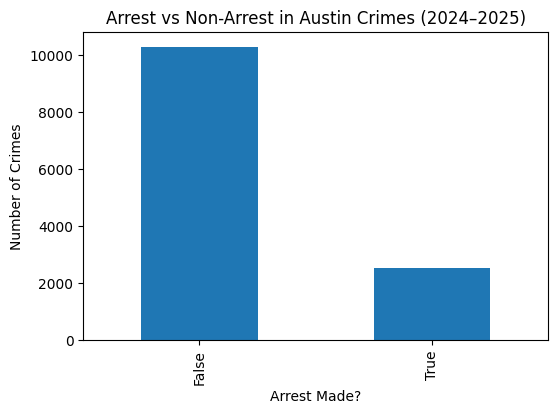

In [15]:
comm25_crimes["Arrest"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Arrest vs Non-Arrest in Austin Crimes (2024–2025)")
plt.xlabel("Arrest Made?")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 7</h3>
<h3>Most crimes in Austin during 2024–2025 did not lead to arrests, showing a gap in case resolutions.</h3>
<hr>

<h2>Main Question #2</h2>

<h3>8.What is the most common type of crime (Primary Type)?</h3>

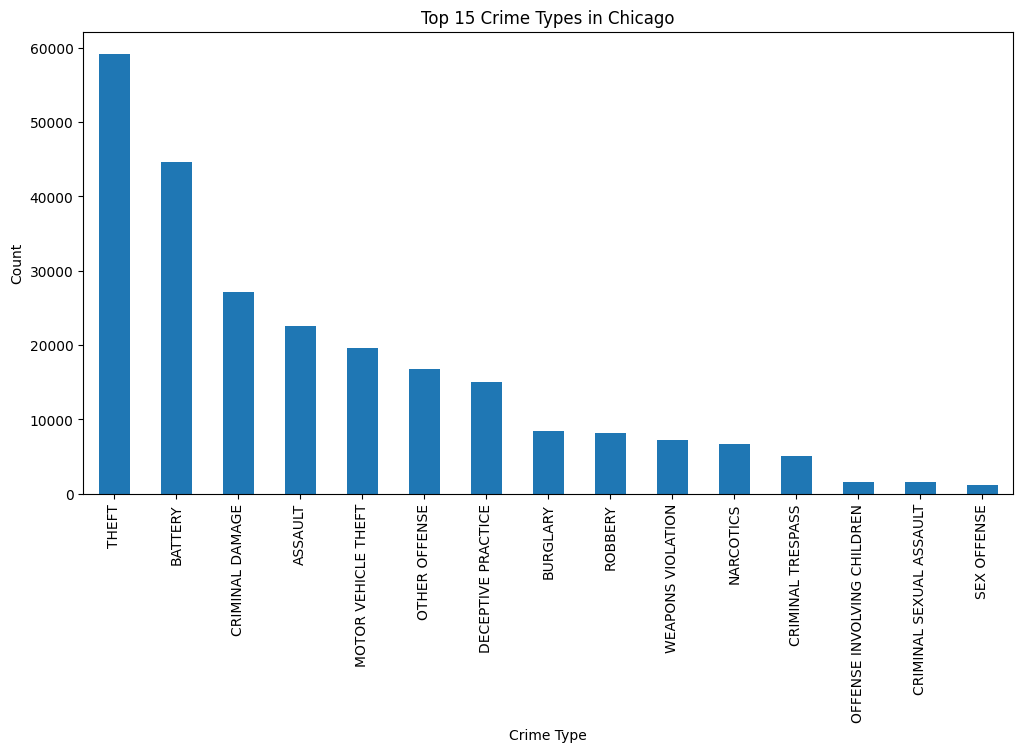

In [16]:
crime_types = df["Primary Type"].value_counts()

crime_types.head(15).plot(kind="bar", figsize=(12,6))
plt.title("Top 15 Crime Types in Chicago")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()

<h3>Insight 8</h3>
<h3>Theft dominates as the most common crime, with nearly 60,000 incidents, followed by Battery (~45,000).</h3>
<hr>
<h3>Insight 9</h3>
<h3>Criminal Damage and Assault also show very high numbers, suggesting property-related and violent crimes are major concerns.</h3>
<hr>

<h2>Follow-up Questions</h2>

<h3>9.Which year had the highest Theft and Battery crimes?</h3>

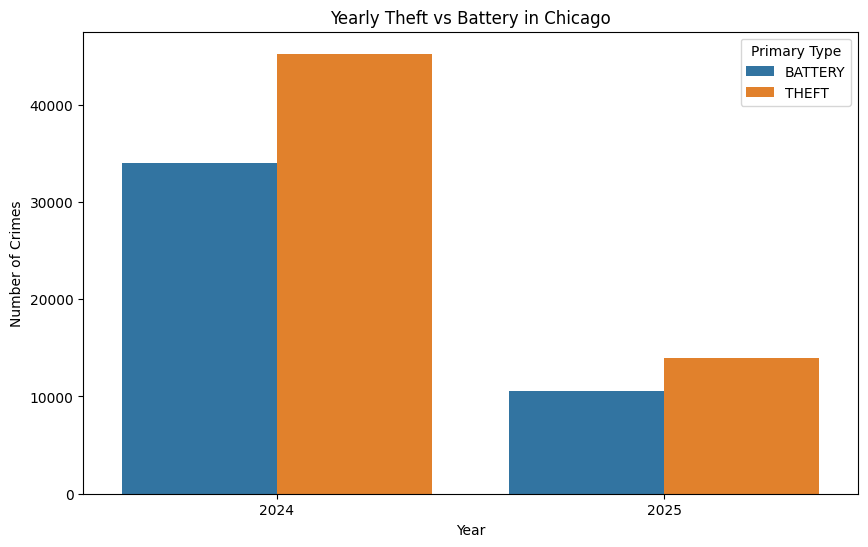

In [17]:
theft_battery = df[df["Primary Type"].isin(["THEFT","BATTERY"])]
yearly_tb = theft_battery.groupby(["Year","Primary Type"]).size().reset_index(name="Counts")
plt.figure(figsize=(10,6))
sns.barplot(data=yearly_tb, x="Year", y="Counts", hue="Primary Type")
plt.title("Yearly Theft vs Battery in Chicago")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 10</h3>
<h3>Theft is consistently higher than Battery, but both follow similar yearly trends.</h3>
<hr>

<h3>10.Do Theft and Battery show seasonal/monthly trends?</h3>

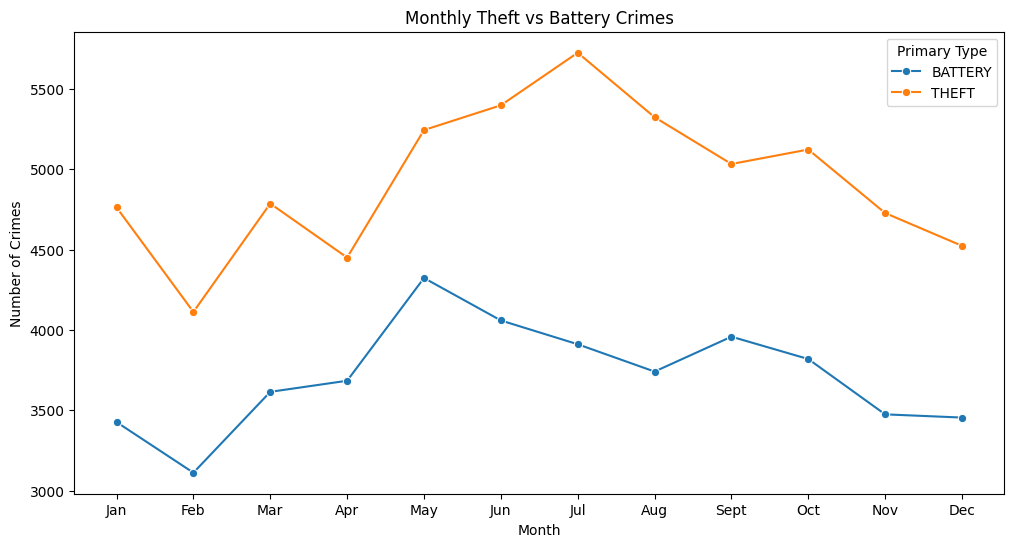

In [18]:
monthly_tb = theft_battery.groupby(["Month","Primary Type"]).size().reset_index(name="Counts")

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_tb, x="Month", y="Counts", hue="Primary Type", marker="o")
plt.title("Monthly Theft vs Battery Crimes")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()

<h3>Insight 11</h3>
<h3>Theft peaks in the summer months (June–August), suggesting a seasonal pattern. We can say it possibly linked to more outdoor activity, tourism, and opportunities for crime.</h3>
<hr>
<h3>Insight 12</h3>
<h3>Battery also rises in May–July, indicating higher violent crime in warmer weather.</h3>
<hr>

<h3>11.Where do most Theft and Battery crimes happen?</h3>

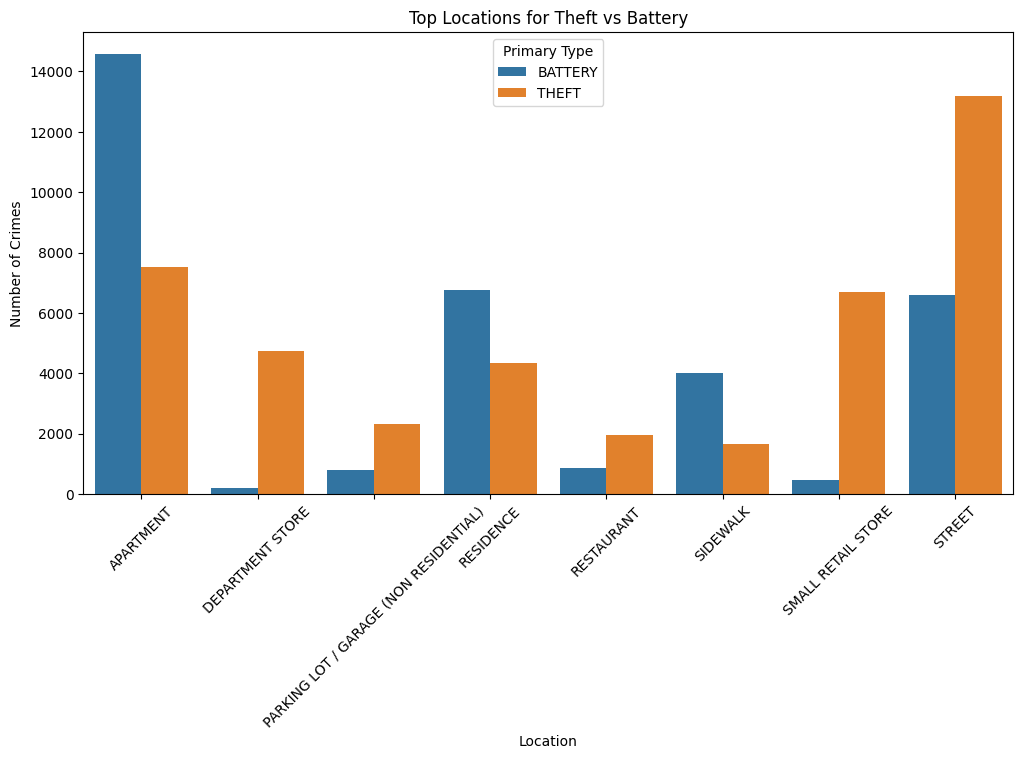

In [19]:
loc_tb = theft_battery.groupby(["Location Description","Primary Type"]).size().reset_index(name="Counts")
top_locs = loc_tb.groupby("Location Description")["Counts"].sum().sort_values(ascending=False).head(8).index
loc_tb = loc_tb[loc_tb["Location Description"].isin(top_locs)]

plt.figure(figsize=(12,6))
sns.barplot(data=loc_tb, x="Location Description", y="Counts", hue="Primary Type")
plt.title("Top Locations for Theft vs Battery")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

<h3>Insight 13</h3>
<h3>Battery is concentrated in private spaces (apartments, residences), possibly linked to domestic violence or disputes.</h3>
<hr>
<h3>Insight 14</h3>
<h3>Theft is concentrated in public and commercial spaces (streets, stores, retail).</h3>
<hr>

<h3>12.Which community areas are most affected by Theft vs Battery?</h3>

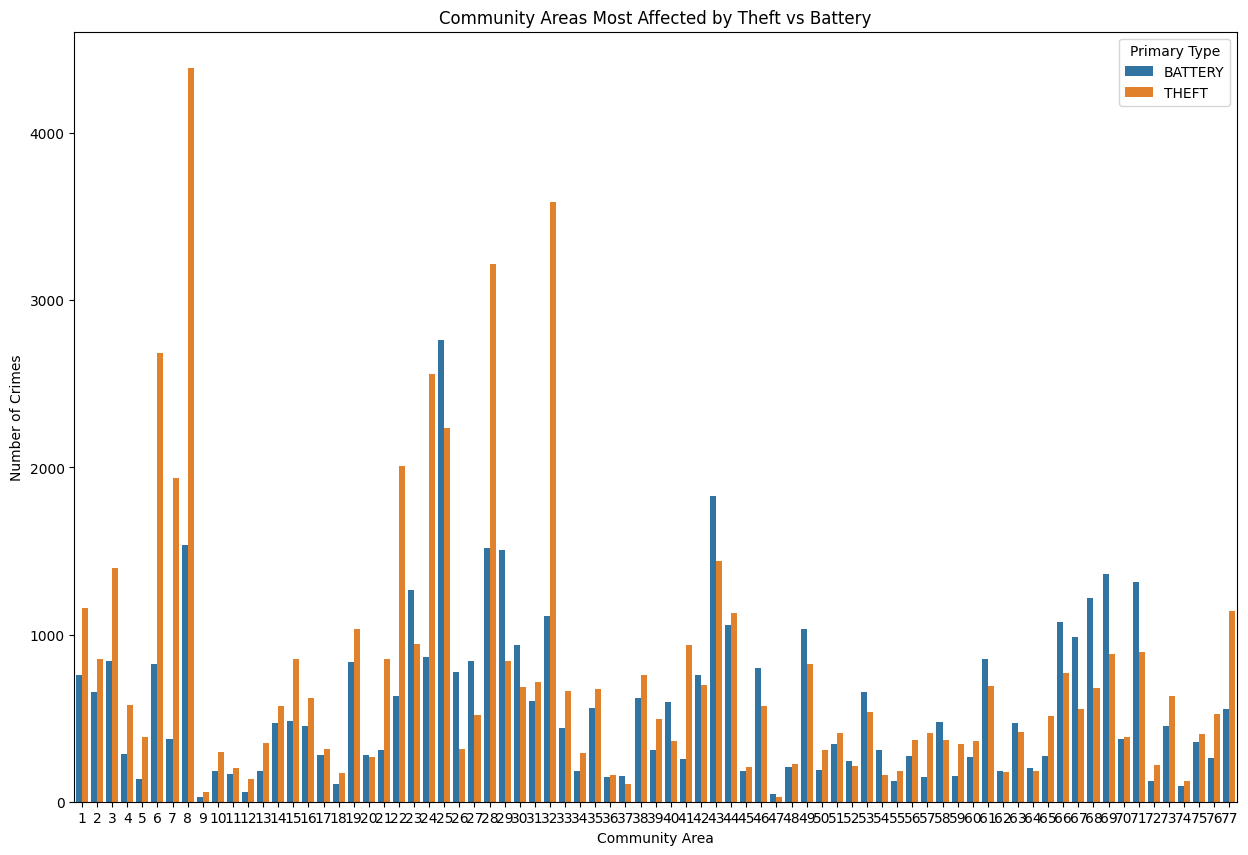

In [20]:
comm_tb = theft_battery.groupby(["Community Area","Primary Type"]).size().reset_index(name="Counts")

plt.figure(figsize=(15,10))
sns.barplot(data=comm_tb, x="Community Area", y="Counts", hue="Primary Type",)
plt.title("Community Areas Most Affected by Theft vs Battery")
plt.xlabel("Community Area")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 15</h3>
<h3>Some communities face disproportionately high Theft, while Battery dominates others, hinting at socio-economic or environmental differences.</h3>
<hr>

<h3>13.Are arrests more common for Theft or Battery?</h3>

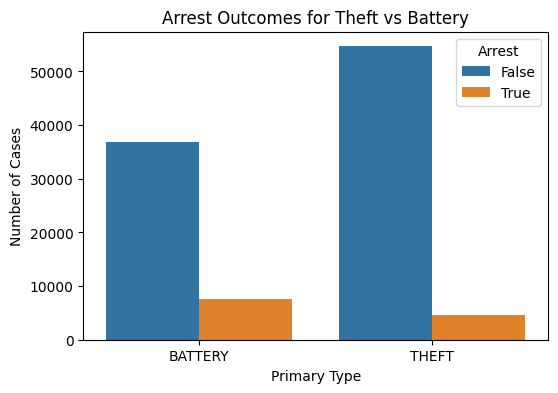

In [21]:
arrest_tb = theft_battery.groupby(["Primary Type","Arrest"]).size().reset_index(name="Counts")

plt.figure(figsize=(6,4))
sns.barplot(data=arrest_tb, x="Primary Type", y="Counts", hue="Arrest")
plt.title("Arrest Outcomes for Theft vs Battery")
plt.ylabel("Number of Cases")
plt.show()

<h3>Insight 16</h3>
<h3>Arrests are more likely in Battery cases compared to Theft, reflecting differences in enforcement.</h3>
<hr>

<h3>14.What is the proportion of Theft vs Battery compared to all crimes?</h3>

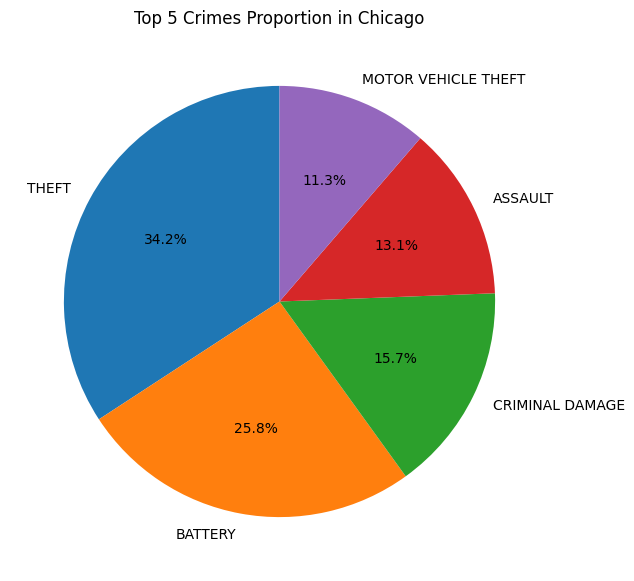

In [22]:
crime_group = df["Primary Type"].value_counts().reset_index()
crime_group.columns = ["Crime","Counts"]

plt.figure(figsize=(7,7))
plt.pie(crime_group.head(5)["Counts"], labels=crime_group.head(5)["Crime"], autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Crimes Proportion in Chicago")
plt.show()

<h3>Insight 17</h3>
<h3>Theft alone makes up a huge share of all crimes, followed by Battery, showing these two dominate overall crime patterns.</h3>
<hr>

<h2>Main Question #3</h2>

<h3>15.Which wards report the highest crime counts?</h3>

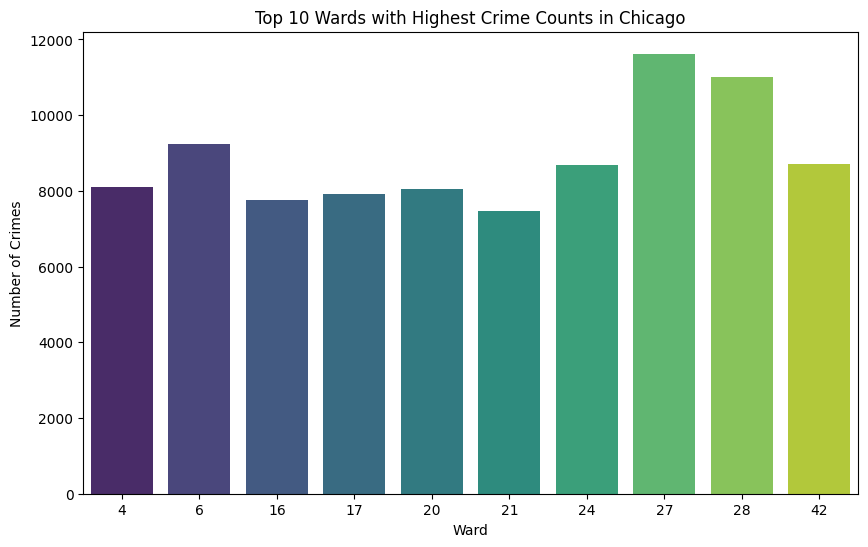

In [23]:
ward_counts = df['Ward'].value_counts().head(10)

ward_df = ward_counts.reset_index()
ward_df.columns = ['Ward', 'Crime Count']

plt.figure(figsize=(10,6))
sns.barplot(x="Ward", y="Crime Count", data=ward_df, palette="viridis")
plt.title("Top 10 Wards with Highest Crime Counts in Chicago")
plt.xlabel("Ward")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 18</h3>
<h3>This suggests crime is geographically concentrated in specific areas rather than being evenly distributed across all wards.</h3>
<hr>

<h2>Follow-up Questions</h2>

<h3>16.Within the ward with the highest crime count, what is the most common crime type?</h3>

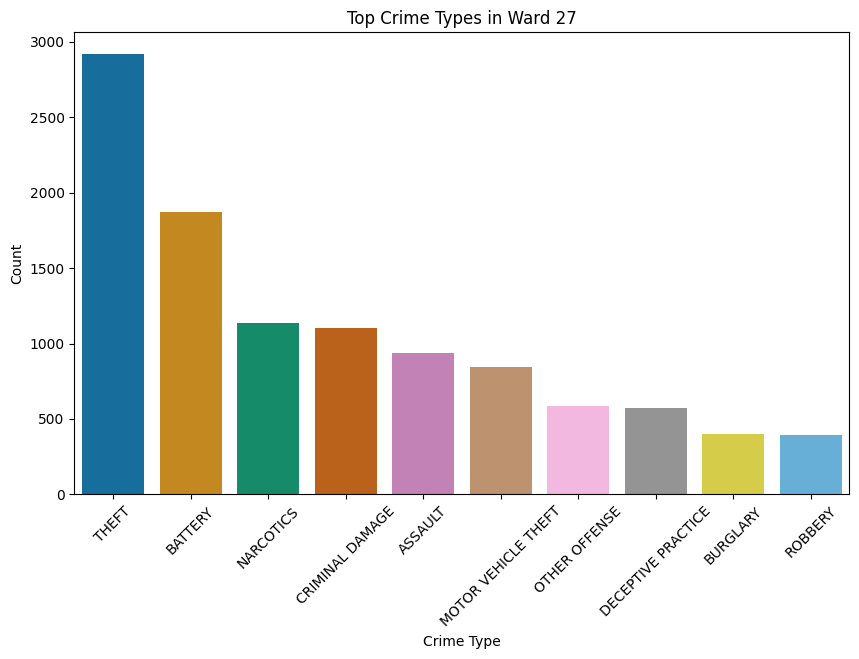

In [24]:
highest_ward = ward_df.iloc[0]['Ward']
ward_data = df[df['Ward'] == highest_ward]

top_crime = ward_data['Primary Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_crime.index, y=top_crime.values, palette = 'colorblind')
plt.title(f"Top Crime Types in Ward {highest_ward}")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<h3>Insight 19</h3>
<h3>Theft is the most common crime (~2,900 cases), significantly higher than all others.</h3>
<hr>
<h3>Insight 20</h3>
<h3>Ward 27 struggles primarily with property crime (Theft) but also has substantial issues with violent crime (Battery, Assault) and drug-related crime (Narcotics).</h3>
<hr>

<h3>17.Which year had the highest crime count in the most dangerous ward?</h3>

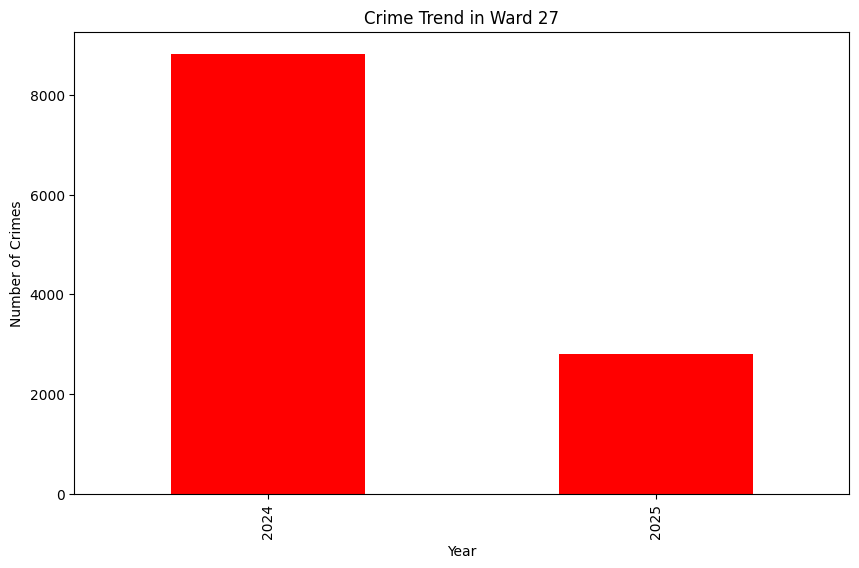

In [25]:
ward_year = ward_data.groupby("Year").size()

plt.figure(figsize=(10,6))
ward_year.plot(kind="bar", color="red")
plt.title(f"Crime Trend in Ward {highest_ward}")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

<h3>Insight 21</h3>
<h3>Ward 27 experienced a crime surge in 2024, but reported incidents in 2025 (so far) are lower, possibly due to incomplete data or early-year trends.</h3>
<hr>

<h3>18.What are the most common locations for crimes in the highest-crime ward?</h3>

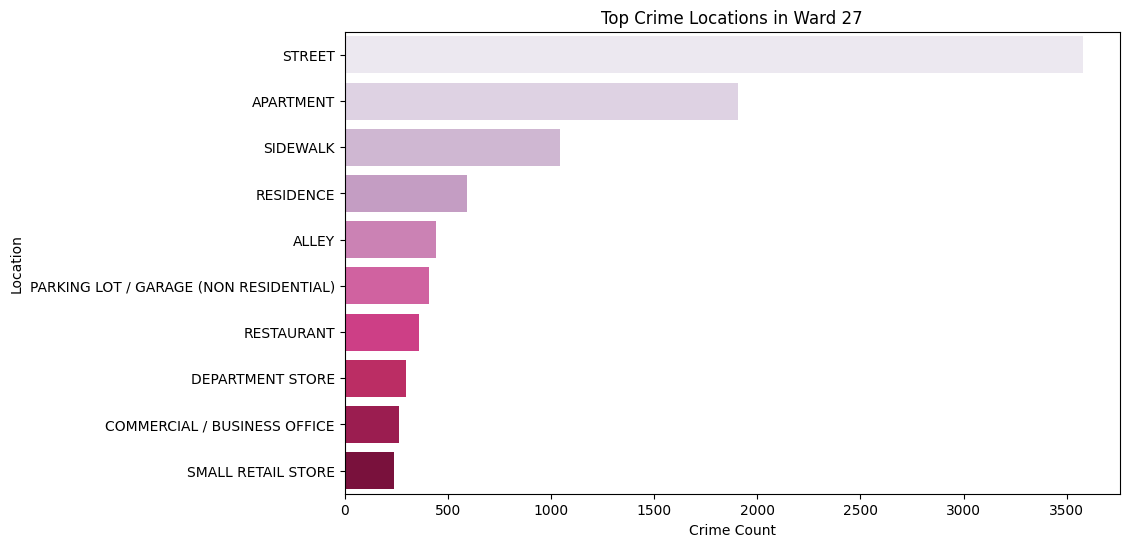

In [26]:
ward_locs = ward_data['Location Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=ward_locs.values, y=ward_locs.index, palette="PuRd")
plt.title(f"Top Crime Locations in Ward {highest_ward}")
plt.xlabel("Crime Count")
plt.ylabel("Location")
plt.show()

<h3>Insight 22</h3>
<h3>Streets dominate as the top crime location (3,500+ cases).</h3>
<hr>
<h3>Insight 23</h3>
<h3>Crimes in Ward 27 are highly street-centered, but also extend into residential spaces (apartments, homes). This indicates both public safety and domestic safety challenges.</h3>
<hr>

<h3>19.Monthly trend of crimes in the highest-crime ward?</h3>

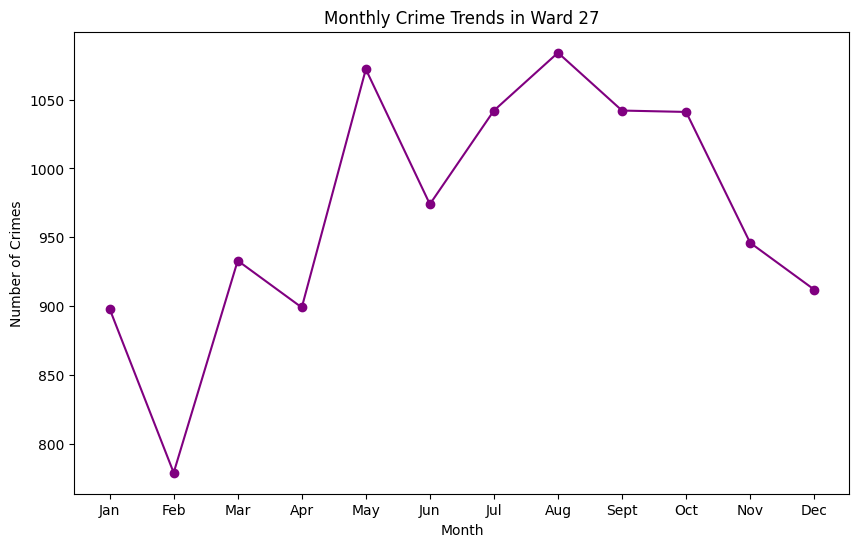

In [27]:
ward_data['Month'] = pd.to_datetime(ward_data['Date']).dt.month
ward_month = ward_data['Month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
ward_month.plot(kind="line", marker="o", color="purple")
plt.title(f"Monthly Crime Trends in Ward {highest_ward}")
plt.xlabel("Month")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.ylabel("Number of Crimes")
plt.show()



<h3>Insight 24</h3>
<h3>Crimes peak in May–August, with the highest cases in August.</h3>
<hr>
<h3>Insight 25</h3>
<h3>The pattern reflects a seasonal trend, with crime increasing in warmer months.</h3>
<hr>

<h3>20.Folium Heatmap of crimes in the highest-crime ward</h3>

In [39]:
ward_map = folium.Map(location=[ward_data['Latitude'].mean(), ward_data['Longitude'].mean()],
                      zoom_start=13)

ward_locations = list(zip(ward_data['Latitude'], ward_data['Longitude']))
HeatMap(ward_locations, radius=7, blur=5).add_to(ward_map)

ward_map.save(f"ward_{highest_ward}_crime_map.html")
ward_map

<h3>Insight 26</h3>
<h3>The ward’s location near downtown/central Chicago means it includes both residential and commercial activity. This mix typically leads to higher theft, assault, and property-related crimes.</h3>
<hr>
<h3>Insight 27</h3>
<h3>Since crime is highly localized in hotspots, targeted patrols or surveillance in these high-density areas could yield stronger prevention results rather than spreading resources evenly across the ward.</h3>
<hr>

<h2>Main Question #4</h2>

<h3>21.What are the most common crimes near public transportation?</h3>

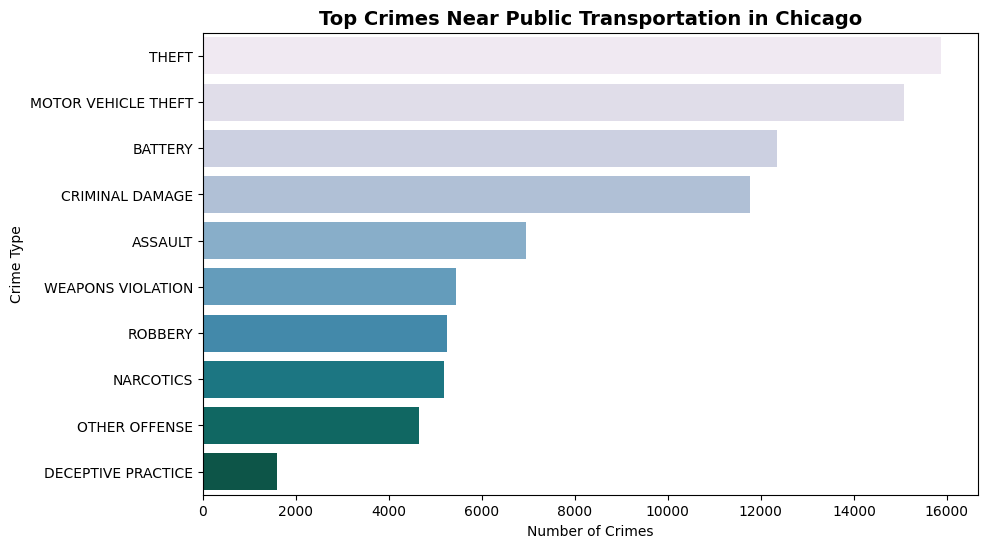

In [29]:
transport_locs = ["STREET", "SIDEWALK", "ALLEY", "CTA STATION", "CTA TRAIN", "CTA BUS"]
transport_df = df[df['Location Description'].isin(transport_locs)]

transport_crimes = transport_df['Primary Type'].value_counts().head(10).reset_index()
transport_crimes.columns = ['Crime Type', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Crime Type', data=transport_crimes, palette="PuBuGn")
plt.title("Top Crimes Near Public Transportation in Chicago", fontsize=14, weight="bold")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<h3>Insight 28</h3>
<h3>Public transportation and high-traffic outdoor spaces in Chicago are major hotspots for theft and violent crime, especially where there’s a lot of movement.</h3>
<hr>

<h2>Follow up Questions</h2>

<h3>22.Which specific transport-related location has the highest crime count?</h3>

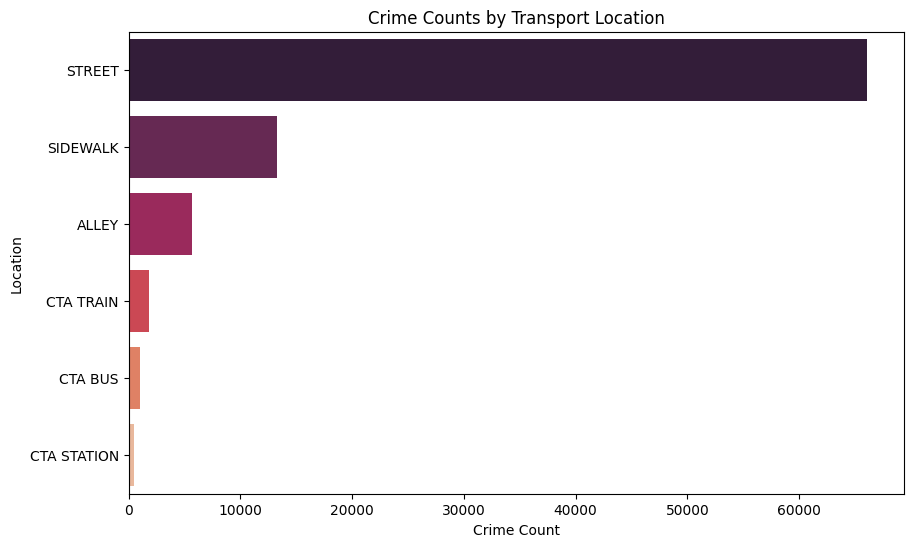

In [30]:
transport_locs = ["STREET", "SIDEWALK", "ALLEY", "CTA STATION", "CTA TRAIN", "CTA BUS"]
transport_df = df[df['Location Description'].isin(transport_locs)]

location_counts = transport_df['Location Description'].value_counts().reset_index()
location_counts.columns = ['Location', 'Crime Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Crime Count', y='Location', data=location_counts, palette="rocket")
plt.title("Crime Counts by Transport Location")
plt.show()

<h3>Insight 29</h3>
<h3>Streets overwhelmingly dominate, making up over 65,000+ incidents.</h3>
<hr>
<h3>Insight 30</h3>
<h3>The majority of transportation-related crime does not occur inside CTA facilities, but rather on the streets and sidewalks leading to or surrounding them.</h3>
<hr>
<h3>Insight 31</h3>
<h3>This shows that transit security should not only focus on trains/buses but also the public spaces around them.</h3>
<hr>

<h3>23.What is the most common crime type at the highest-risk transport location?</h3>

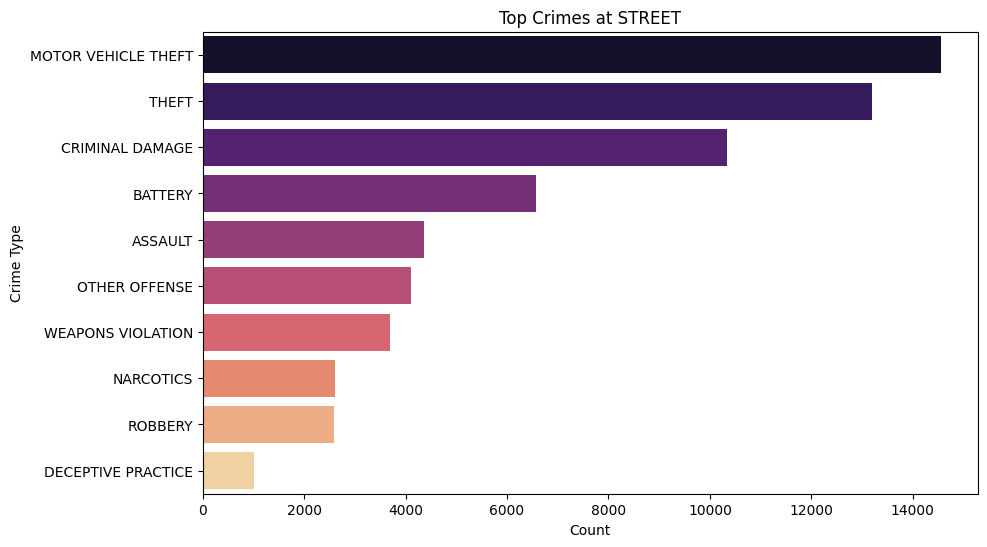

In [31]:
top_location = location_counts.iloc[0]['Location']
top_loc_data = transport_df[transport_df['Location Description'] == top_location]

top_loc_crimes = top_loc_data['Primary Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_loc_crimes.values, y=top_loc_crimes.index, palette="magma")
plt.title(f"Top Crimes at {top_location}")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()


<h3>Insight 32</h3>
<h3>The street environment is highly vulnerable to vehicle-related crimes, which aligns with broader citywide patterns. Parking areas, poorly lit zones, and unattended vehicles are major risk factors.</h3>
<hr>

<h3>24.What is the proportion of crimes across transport-related locations?</h3>

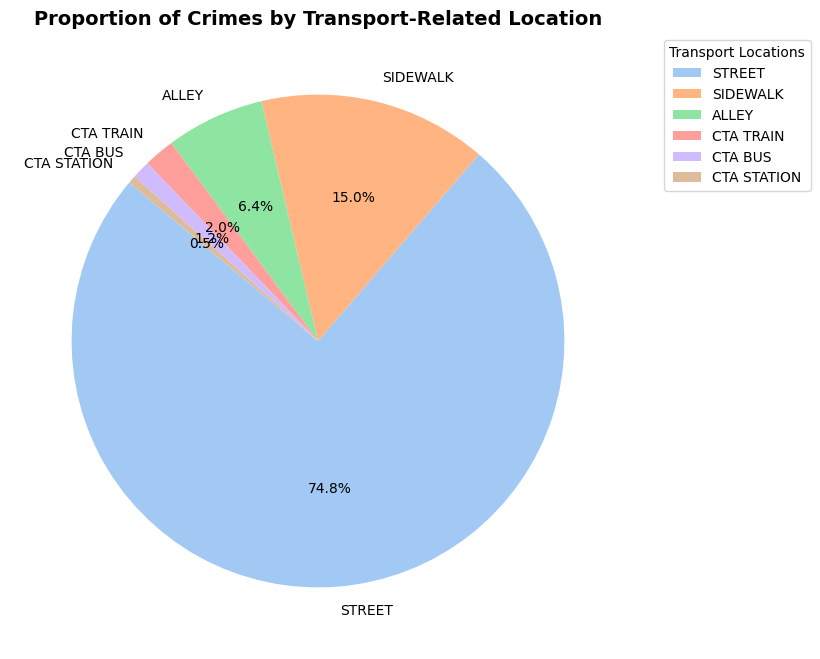

In [32]:
transport_locs = ["STREET", "SIDEWALK", "ALLEY", "CTA STATION", "CTA TRAIN", "CTA BUS"]
transport_df = df[df['Location Description'].isin(transport_locs)]

location_counts = transport_df['Location Description'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proportion of Crimes by Transport-Related Location", fontsize=14, weight="bold")
plt.legend(location_counts.index, title="Transport Locations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<h3>Insight 33</h3>
<h3>Transit hubs themselves are relatively safer compared to the immediate outdoor environment. This suggests public perception of CTA as unsafe might be more related to the surrounding streets than the system itself.</h3>
<hr>

<h3>25.What is the arrest rate for crimes near public transportation</h3>

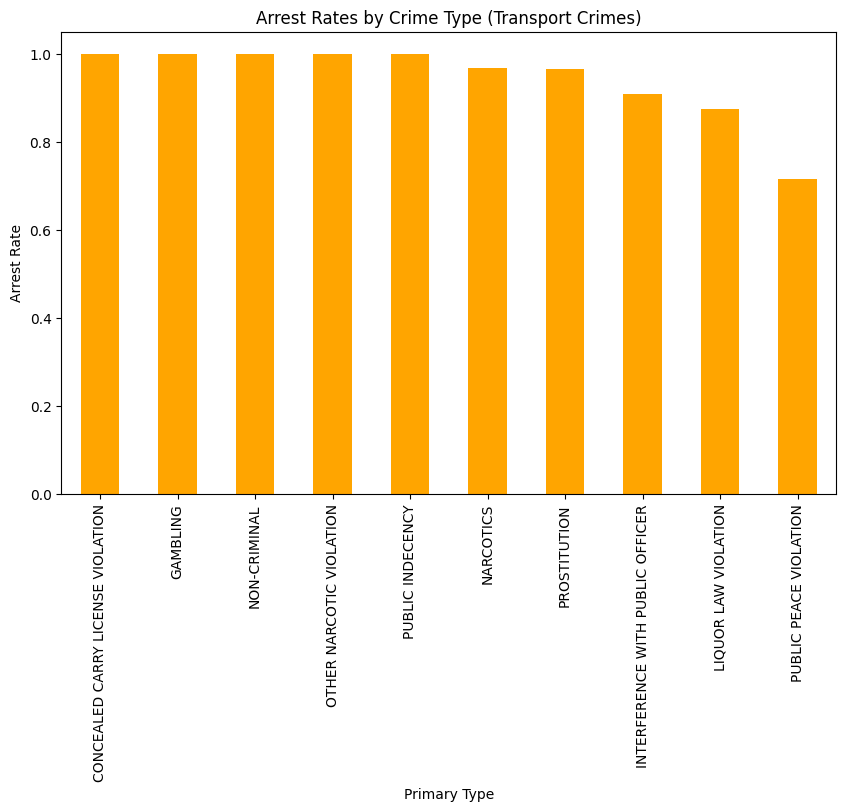

In [33]:
arrest_rate = transport_df['Arrest'].mean()
arrest_by_type = transport_df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
arrest_by_type.plot(kind="bar", color="orange")
plt.title("Arrest Rates by Crime Type (Transport Crimes)")
plt.ylabel("Arrest Rate")
plt.show()

<h3>Insight 34</h3>
<h3>Crimes that are clear-cut and enforcement-driven (like drug possession or license violations) are much more likely to result in arrests compared to more complex or harder-to-prove crimes like theft or assault.</h3>
<hr>

<h3>25.Are transport-related crimes seasonal (monthly trends)?</h3>

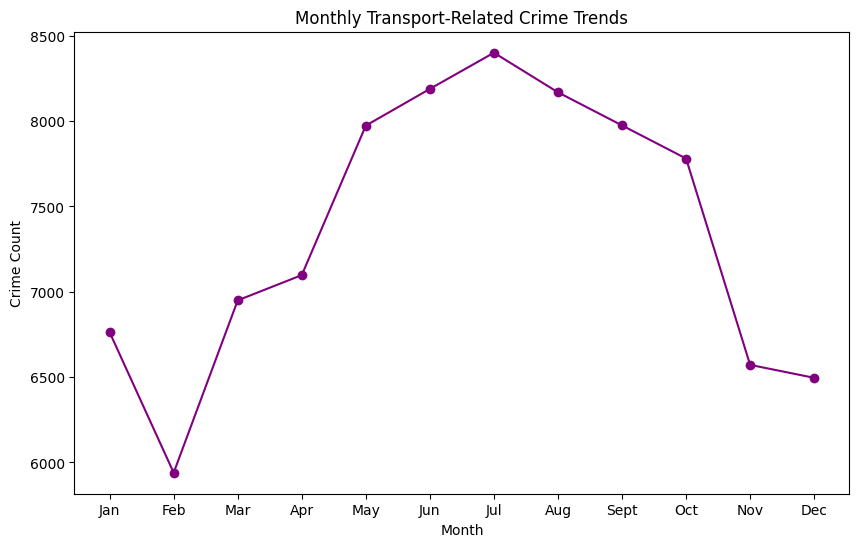

In [34]:
transport_df['Month'] = pd.to_datetime(transport_df['Date']).dt.month
monthly_transport = transport_df['Month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
monthly_transport.plot(kind="line", marker="o", color="purple")
plt.title("Monthly Transport-Related Crime Trends")
plt.xlabel("Month")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.ylabel("Crime Count")
plt.show()

<h3>Insight 35</h3>
<h3>Seasonal variation shows that hot weather increases crime activity, likely because more people are outside and using transportation.</h3>
<hr>

<h3>25.Folium Heatmap of transport-related crimes</h3>

In [37]:
transport_map = folium.Map(location=[transport_df['Latitude'].mean(), transport_df['Longitude'].mean()], zoom_start=10)
transport_locations = list(zip(transport_df['Latitude'], transport_df['Longitude']))

HeatMap(transport_locations, radius=7, blur=5).add_to(transport_map)
transport_map.save("transport_crimes_map.html")
transport_map

<h3>Insight 36</h3>
<h3>The heatmap shows the brightest clusters around central Chicago, especially near the Loop and Near North Side.</h3>
<hr>
<h3>Insight 37</h3>
<h3>Crimes are clustered along major street corridors and intersections, suggesting opportunistic crimes (like theft, robbery, assault) are concentrated where people gather or pass through.</h3>
<hr><h3>Insight 38</h3>
<h3>Transport-related crimes in Chicago are highly concentrated in downtown transit zones and along major corridors, with CTA stations and busy streets being prime hotspots. This supports the need for targeted patrols, surveillance, and preventive measures at central nodes rather than spreading resources uniformly.</h3>
<hr>